# <center> Logistic Clasification </center>



## Exploring the data

---

In [1]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import warnings
import matplotlib.pyplot as plt

from sklearn.datasets        import load_iris
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.preprocessing   import scale
from sklearn.decomposition   import PCA

In [6]:

cancer_data = pd.read_csv("./breast_cancer_wisconsin.csv", index_col=0)

X = cancer_data.iloc[:, 1:]
Y = cancer_data.iloc[:, 0].map({'M':1, 'B':0})[:, np.newaxis]

cols = X.columns

print(cols)
print(X.head())

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
          radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42   

In [10]:
# Eliminate Unnamed
X = cancer_data.iloc[:, 1:-1]
print(X.head())

          radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
id                

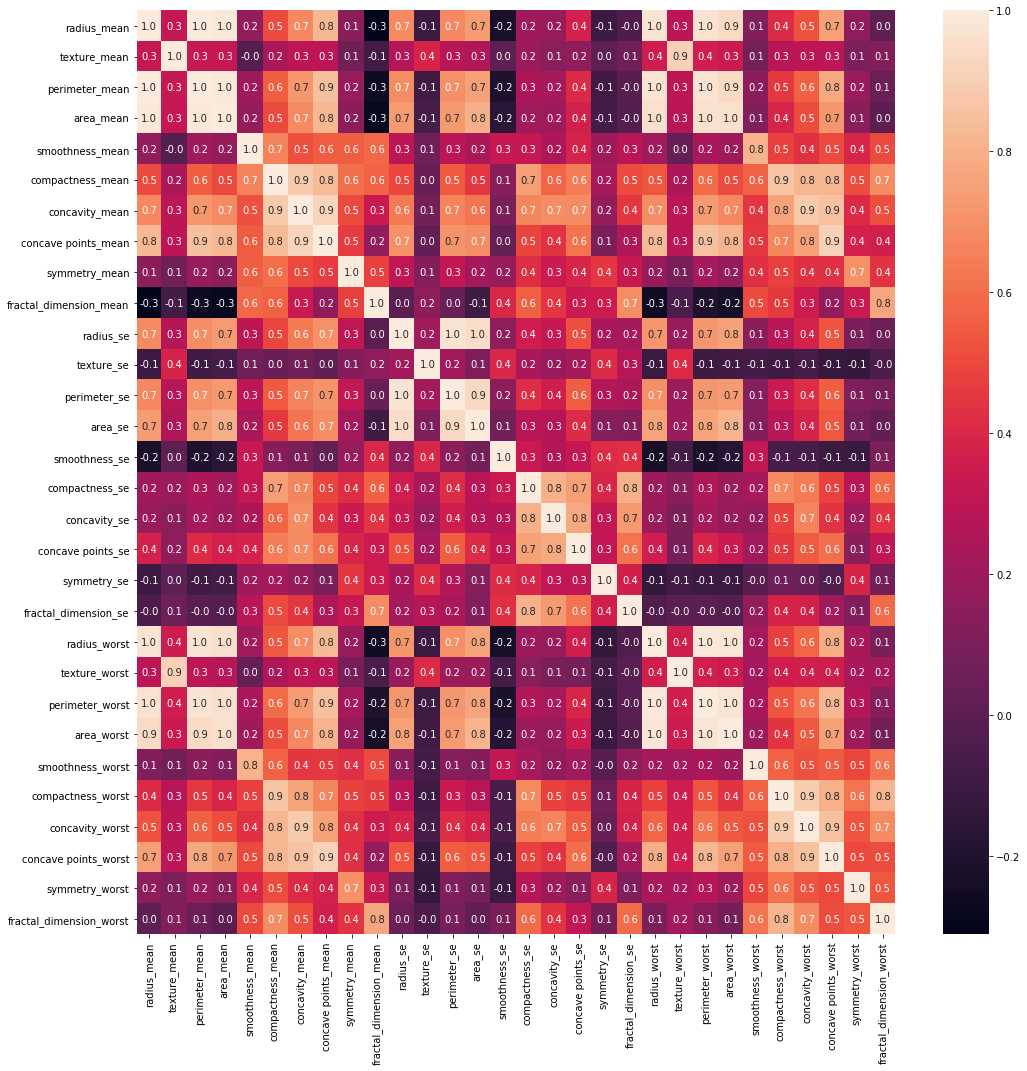

In [11]:
# Seaborn version

corr = X.corr()

plt.subplots(figsize=(17,17))

sb.heatmap(corr, annot=True, fmt= '.1f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

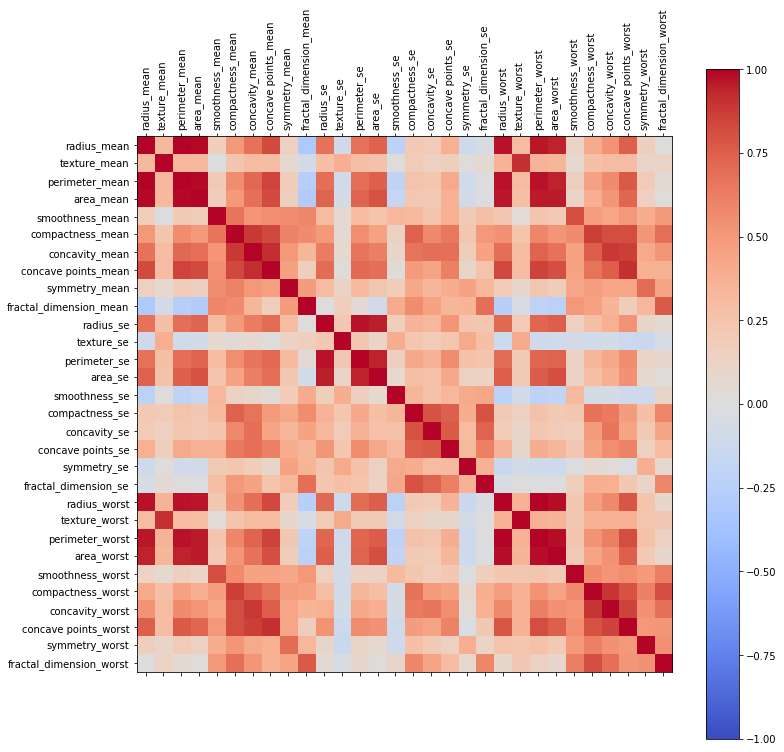

In [12]:
# PLT version

plt.figure(figsize=(12,12))
plt.matshow(X.corr(), cmap="coolwarm", vmin=-1.0, vmax=1.0, fignum=1)

plt.grid(False)
plt.colorbar()

plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.yticks(range(len(X.columns)), X.columns)

plt.show()

## Logistic Regression with Sklearn

---

In [14]:
warnings.filterwarnings('ignore')

# Simple Logistic Regression

l1 = []

for i in range(250): # Reduce variability of train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y.ravel(), test_size=0.3)
    clf = LogisticRegression().fit(X_train, Y_train)
    l1.append(clf.score(X_test, Y_test))
    
np.mean(l1)

0.9439298245614035

In [15]:

# Logistic Regression with Polynomial features

l2 = []

for i in range(250):
    
    X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(X), 
                                                        Y.ravel(), test_size=0.3)
    clf = LogisticRegression().fit(X_train, Y_train)
    l2.append(clf.score(X_test, Y_test))

np.mean(l2)

0.9496842105263157

In [16]:

# Logistic Regression and Scale

l3 = []

for i in range(250):
    
    X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=True, with_std=True),
                                                        Y.ravel(), test_size=0.3)
    clf  = LogisticRegression().fit(X_train, Y_train)
    l3.append(clf.score(X_test, Y_test))

np.mean(l3)

0.9757894736842104

In [20]:

# Logistic Regression with Polynomial features and Scale

l4 = []

for i in range(250):

    X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(scale(X,
                                        with_mean=True, with_std=True)), Y.ravel(), test_size=0.3)

    clf  = LogisticRegression().fit(X_train, Y_train)
    l4.append(clf.score(X_test, Y_test))

np.mean(l4)

0.9622923976608188

In [21]:

# Logistic Regression with Scale and Polynomial features

l5 = []

for i in range(250):

    X_train, X_test, Y_train, Y_test = train_test_split(scale(PolynomialFeatures(2).fit_transform(X),
                                     with_mean=True, with_std=True), Y.ravel(), test_size=0.3)
    clf  = LogisticRegression().fit(X_train, Y_train)

    l5.append(clf.score(X_test, Y_test))

np.mean(l5)

0.9704795321637425

In [35]:

# Logistic Regression with PCA and Scale

l6 = []
pca = PCA(n_components=20)

for i in range(250):


    X_train, X_test, Y_train, Y_test = train_test_split(pca.fit_transform(scale(X,
                        with_mean=True, with_std=True)), Y.ravel(), test_size=0.3)
    
    clf  = LogisticRegression().fit(X_train, Y_train)
    l6.append(clf.score(X_test, Y_test))

print(np.mean(l6), "\n")

print(pca.explained_variance_ratio_)

0.9775204678362572 

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783 0.00266209 0.00197997 0.00175396
 0.00164925 0.00103865]


In [37]:
print("Simple:             ", np.mean(l1))
print("Polynomial:         ", np.mean(l2))
print("Scale:              ", np.mean(l3))
print("Polynomial + Scale: ", np.mean(l4))
print("Scale + Polynomial: ",  np.mean(l5))
print("PCA + Scale:        ",  np.mean(l6))

Simple:              0.9439298245614035
Polynomial:          0.9496842105263157
Scale:               0.9757894736842104
Polynomial + Scale:  0.9622923976608188
Scale + Polynomial:  0.9704795321637425
PCA + Scale:         0.9775204678362572
